# Prueba - Fundamentos Data Science
---
Martes 19 de mayo de 2020, Santiago de Chile

### Sakura SPA
**Miembros de la Célula:** 

Susana Arce

Fabiola Aravena

Rodrigo Pereira

--- 

**Administrador de Contrato:** Gonzalo Seguel

**Sponsor:** Andrea Villaroel

---  

#### Objetivo:
Nuestro sponsor posee un cátalogo de contenido audiovisual de 12.294 títulos de Anime, requiere poder efecturar recomendaciones de qué ver a los usuarios en base a otros Anime han sido de su gusto.

#### Propuesta:
Aplicación web en donde el usuario seleccione de una lista de Anime propuestos los que han sido de su gusto, y en base a ello se le entregue una lista de otras alternativas que sean a fin con sus preferencias.


***Los archivos pueden ser descargados desde: https://drive.google.com/open?id=1TlhsxxaTENAO6xIw-EvvZhRAuJaJtPFB***

---
## Procesamiento de los datos

Se procesan los data sets recibidos para su posterior modelamiento y predicción

In [229]:
# Importación de librerías para procesamiento de datos.
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

import factor_analyzer as factor
import missingno as msngo

import warnings
warnings.filterwarnings(action="ignore")


### Recogida de datos
---

In [230]:
#Importamos los data sets para su procesamiento
df_interacciones = pd.read_csv("rating.csv") 
df_interacciones.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [231]:
df_titulos = pd.read_csv("anime.csv", sep=";") 
df_titulos.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,"9,37",200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,"9,26",793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,"9,25",114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,"9,17",673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,"9,16",151266


### Procesamiento de datos
---

**Data Set de Interacciones**

In [232]:
len(df_interacciones) #Exploramos la cantidad de registros del data set

7813737

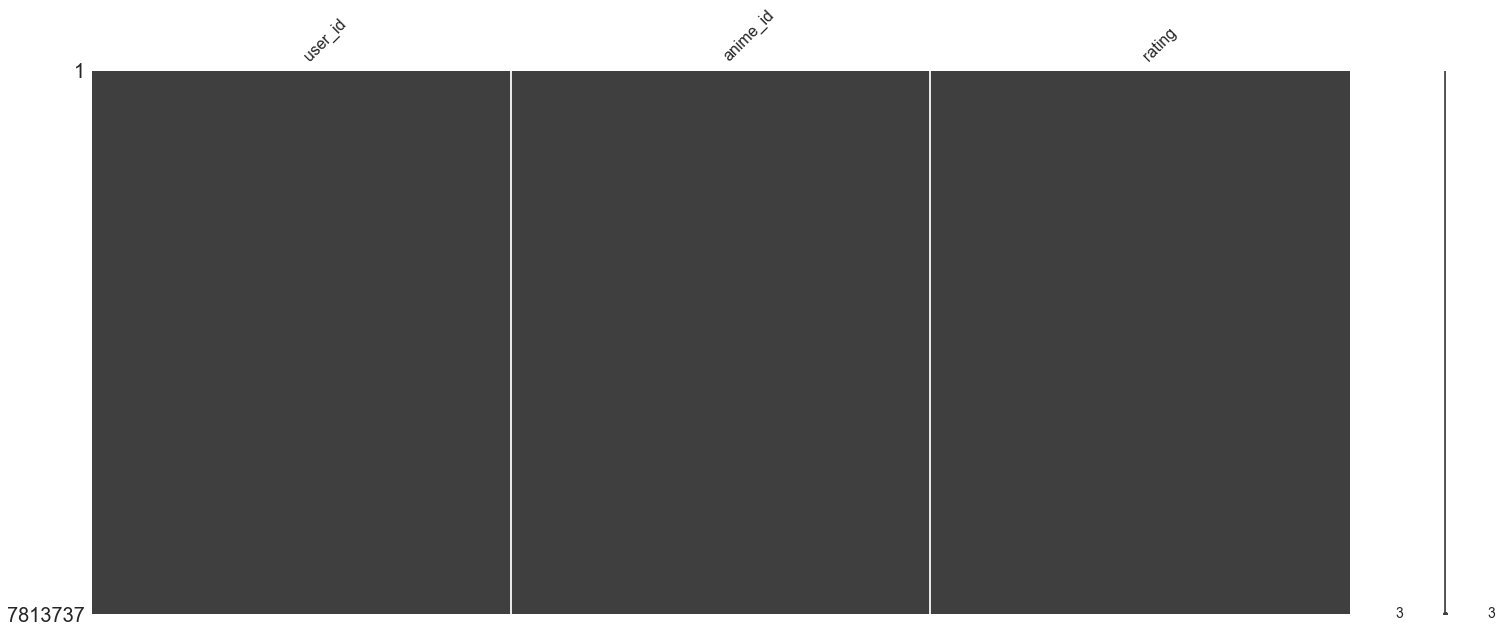

In [233]:
msngo.matrix(df_interacciones) #exploramos la completitud de los datos

In [234]:
for i in df_interacciones.columns:
    a= df_interacciones[i].unique()
    print("-------------------------------")
    print("Columna: "+i)
    print(len(a)) #Exploramos la cantidad de categorías de cada atributo
    print(df_interacciones[i].isnull().value_counts()) #Exploramos la cantidad de valores nulo en los registros
    print(a) 

-------------------------------
Columna: user_id
73515
False    7813737
Name: user_id, dtype: int64
[    1     2     3 ... 73514 73515 73516]
-------------------------------
Columna: anime_id
11200
False    7813737
Name: anime_id, dtype: int64
[   20    24    79 ... 29481 34412 30738]
-------------------------------
Columna: rating
11
False    7813737
Name: rating, dtype: int64
[-1 10  8  6  9  7  3  5  4  1  2]


Se observa que no existen registros nulos

Existen 73.515 user_id y 11.200 títulos de anime diferentes

**Data Set de Títulos**

In [235]:
len(df_titulos) #Exploramos la cantidad de registros del data set

12294

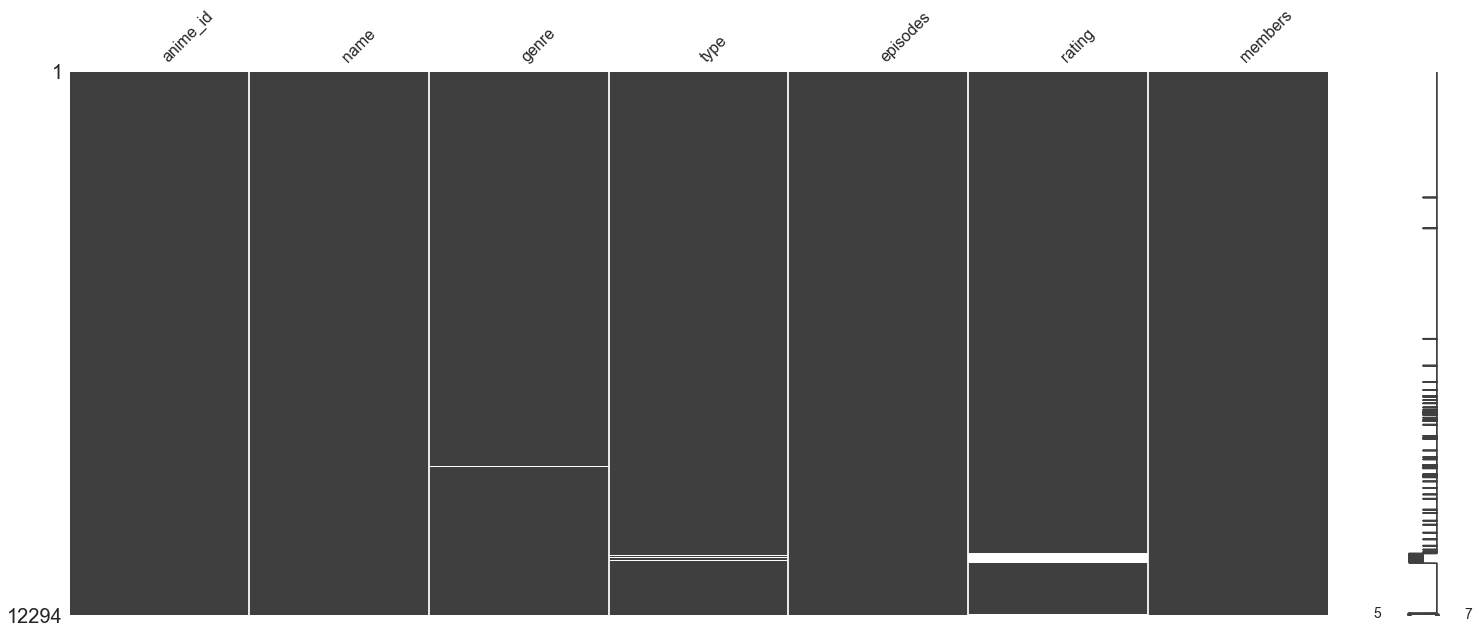

In [236]:
msngo.matrix(df_titulos) #exploramos la completitud de los datos

In [237]:
for i in df_titulos.columns:
    a= df_titulos[i].unique()
    print("-------------------------------")
    print("Columna: "+i)
    print(len(a)) #Exploramos la cantidad de categorías de cada atributo
    print(df_titulos[i].isnull().value_counts()) #Exploramos la cantidad de valores nulo en los registros
    print(a) 

-------------------------------
Columna: anime_id
12294
False    12294
Name: anime_id, dtype: int64
[32281  5114 28977 ...  5621  6133 26081]
-------------------------------
Columna: name
12292
False    12294
Name: name, dtype: int64
['Kimi no Na wa.' 'Fullmetal Alchemist: Brotherhood' 'Gintama°' ...
 'Violence Gekiga David no Hoshi'
 'Violence Gekiga Shin David no Hoshi: Inma Densetsu'
 'Yasuji no Pornorama: Yacchimae!!']
-------------------------------
Columna: genre
3272
False    12247
True        47
Name: genre, dtype: int64
['Drama, Romance, School, Supernatural'
 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen'
 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen' ...
 'Hentai, Sports' 'Drama, Romance, School, Yuri' 'Hentai, Slice of Life']
-------------------------------
Columna: type
7
False    12269
True        25
Name: type, dtype: int64
['Movie' 'TV' 'OVA' 'Special' 'Music' 'ONA' nan]
-------------------------------
Columna: episodes
187
False    12294

Se observa que existen registros nulos

Existen 12.294 títulos de anime diferentes

In [238]:
# Limpiamos y pasamos a float el atributo ranking
df_titulos["rating"] = df_titulos["rating"].str.replace(",",".")
df_titulos["rating"] = df_titulos["rating"].str.replace(" ","")
df_titulos["rating"] = df_titulos["rating"].astype(float)
df_titulos["rating"].isnull().value_counts()

False    12064
True       230
Name: rating, dtype: int64

In [239]:
# Limpiamos y pasamos a float el atributo episodes
df_titulos["episodes"].value_counts()

1          5677
2          1076
12          816
13          572
26          514
3           505
Unknown     340
4           327
6           268
24          181
52          177
25          165
5           121
10          114
51          103
39           86
50           83
11           72
7            72
8            60
22           42
9            40
20           36
48           35
23           33
14           32
49           31
16           30
47           25
38           23
           ... 
87            1
1306          1
224           1
366           1
71            1
67            1
175           1
83            1
125           1
201           1
191           1
331           1
163           1
237           1
1006          1
694           1
124           1
1428          1
726           1
150           1
283           1
1818          1
1274          1
90            1
263           1
373           1
172           1
120           1
330           1
167           1
Name: episodes, Length: 

In [240]:
# Limpiamos y pasamos a float el atributo episodes
df_titulos["episodes"] = df_titulos["episodes"].replace("Unknown",None)
df_titulos["episodes"] = df_titulos["episodes"].astype(float)

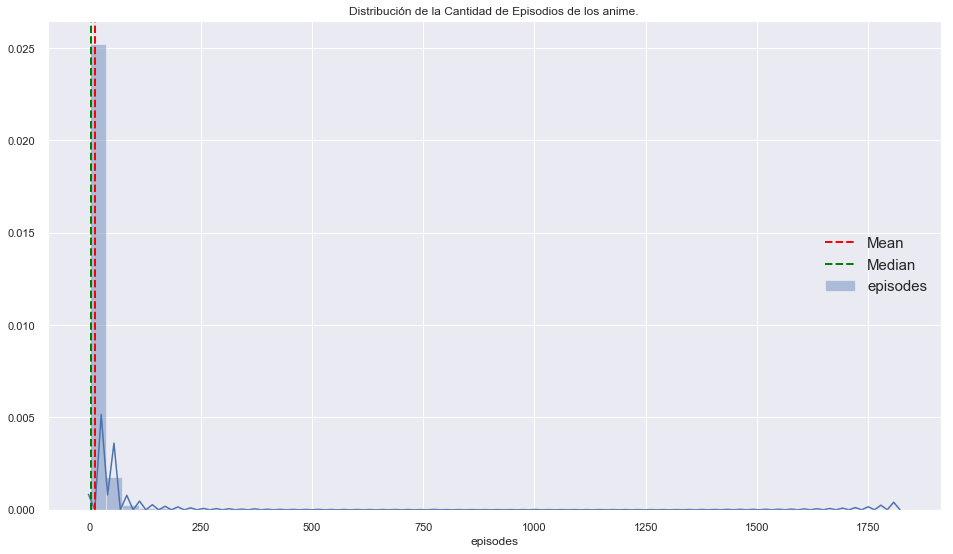

In [241]:
var = "episodes"
sns.set(rc={'figure.figsize':(16,9)})
sns.distplot(df_titulos[var].dropna())
plt.axvline(df_titulos[var].mean(),lw=2, color='red', linestyle='--')
plt.axvline(df_titulos[var].median(),lw=2, color='green', linestyle='--')
plt.legend(loc=(5),fontsize=15,labels=["Mean","Median",var])
plt.title("Distribución de la Cantidad de Episodios de los anime.");

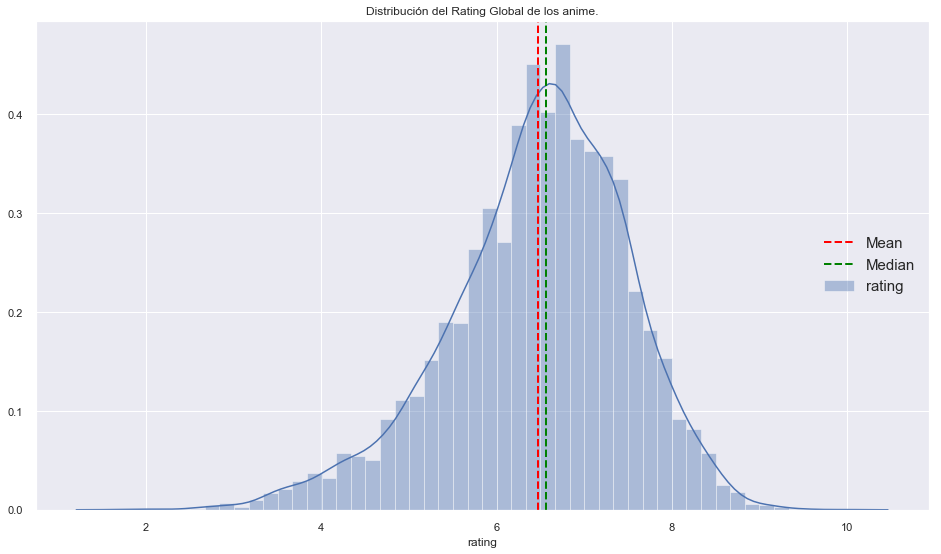

In [242]:
var = "rating"
sns.set(rc={'figure.figsize':(16,9)})
sns.distplot(df_titulos[var].dropna())
plt.axvline(df_titulos[var].mean(),lw=2, color='red', linestyle='--')
plt.axvline(df_titulos[var].median(),lw=2, color='green', linestyle='--')
plt.legend(loc=(5),fontsize=15,labels=["Mean","Median",var])
plt.title("Distribución del Rating Global de los anime.");

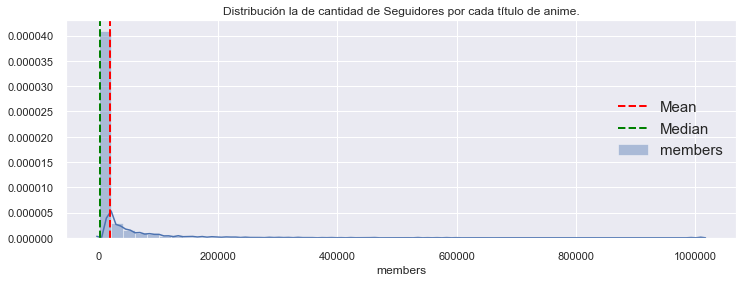

In [243]:
var = "members"
sns.set(rc={'figure.figsize':(12,4)})
sns.distplot(df_titulos[var].dropna())
plt.axvline(df_titulos[var].mean(),lw=2, color='red', linestyle='--')
plt.axvline(df_titulos[var].median(),lw=2, color='green', linestyle='--')
plt.legend(loc=(5),fontsize=15,labels=["Mean","Median",var])
plt.title("Distribución la de cantidad de Seguidores por cada título de anime.");

In [244]:
df_titulos["log_members"] = np.log(df_titulos["members"])

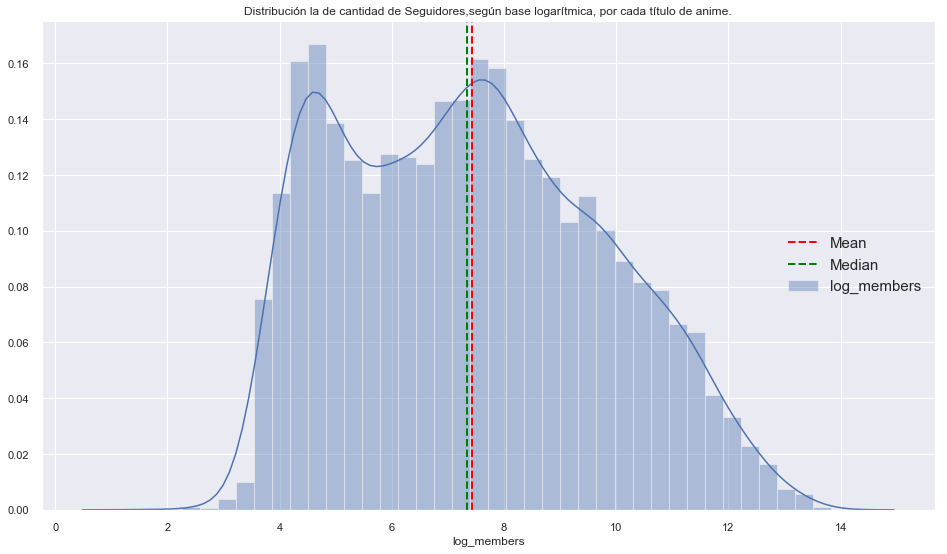

In [245]:
var = "log_members"
sns.set(rc={'figure.figsize':(16,9)})
sns.distplot(df_titulos[var].dropna())
plt.axvline(df_titulos[var].mean(),lw=2, color='red', linestyle='--')
plt.axvline(df_titulos[var].median(),lw=2, color='green', linestyle='--')
plt.legend(loc=(5),fontsize=15,labels=["Mean","Median",var])
plt.title("Distribución la de cantidad de Seguidores,según base logarítmica, por cada título de anime.");

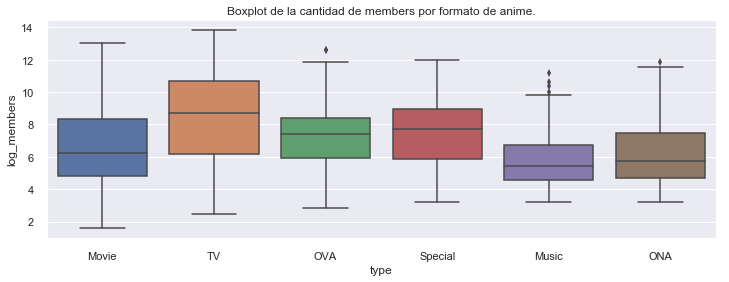

In [246]:
plt.figure(figsize=(12,4))
plt.title("Boxplot de la cantidad de members por formato de anime.")
sns.boxplot(y=df_titulos["log_members"], x=df_titulos["type"]);

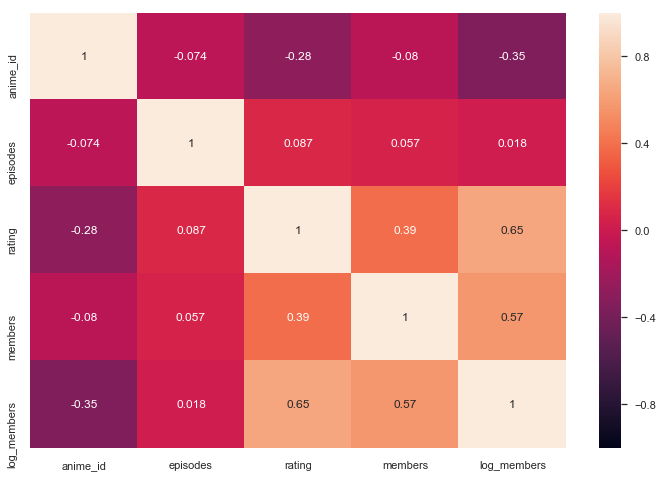

In [247]:
plt.subplots(figsize=(12, 8))
data = df_titulos
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)

In [248]:
users = df_interacciones["user_id"].unique()
titulos_evaluados = df_interacciones["anime_id"].unique()
titulos_all = df_titulos["anime_id"].unique()

In [249]:
len(titulos_evaluados)

11200

**Relación entre data sets**

In [250]:
# Se revisan titulos que se encuentren en df_interacciones y no en df_titulos para sacarlos
registro = 0
titles_cruce = []
faltantes = []
for a in titulos_evaluados:
    faltantes.append(a)
    for b in titulos_all:
        if a == b:
            registro = registro +1
            titles_cruce.append(a)
            faltantes.remove(a)
            break

In [251]:
faltantes 

[30913, 30924, 20261]

In [252]:
#Se obtienen 3 registros faltantes en df_titulos que se proceden a eliminar de df_interacciones
eliminar_1 = []
for i in faltantes:
    eliminar_1.append(df_interacciones[df_interacciones["anime_id"] == i].index)
    df_interacciones.drop(df_interacciones[df_interacciones["anime_id"] == i].index, inplace=True)

In [253]:
#total de registros eliminados
total = 0
for i in eliminar_1:
    largo=len(i)
    total = total + largo
total

10

In [254]:
# Se revisan titulos que se encuentren en en df_titulos y no df_interacciones para sacarlos
registro2 = 0
titles_cruce2 = []
faltantes2 = []
for a in titulos_all:
    faltantes2.append(a)
    for b in titulos_evaluados:
        if a == b:
            registro2 = registro +1
            titles_cruce2.append(a)
            faltantes2.remove(a)
            break

In [255]:
len(faltantes2)

1097

In [256]:
#Se obtienen 1.097 registros faltantes en df_interacciones que se proceden a eliminar de df_titulos
eliminar_2 = []
for i in faltantes2:
    eliminar_2.append(df_titulos[df_titulos["anime_id"] == i].index)
    df_titulos.drop(df_titulos[df_titulos["anime_id"] == i].index, inplace=True)

In [257]:
#total de registros eliminados
total2 = 0
for i in eliminar_2:
    largo=len(i)
    total2 = total2 + largo
total2

1097

**Completitud de datos de df_titulos**

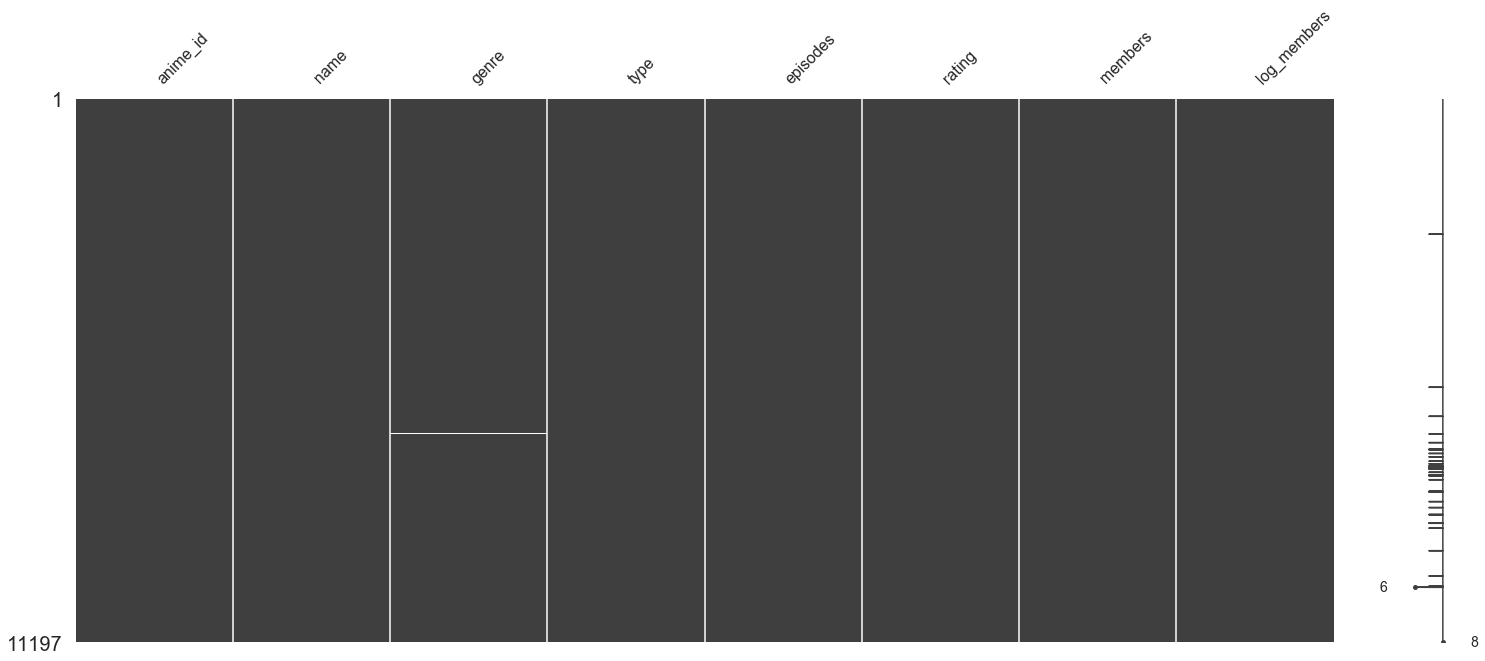

In [258]:
msngo.matrix(df_titulos) #re-exploramos la completitud de los datos

In [259]:
len(df_titulos)

11197

**Se observa un aumento considerable en la completitud de los datos**

In [260]:
# Re-exploración en detalle de los registros nulos
for i in df_titulos.columns:
    a= df_titulos[i].unique()
    print("-------------------------------")
    print("Columna: "+i)
    print(len(a)) #Exploramos la cantidad de categorías de cada atributo
    print(df_titulos[i].isnull().value_counts()) #Exploramos la cantidad de valores nulo en los registros
    print("Detalle de registros nulos:")
    print(df_titulos[df_titulos[i].isnull()])


-------------------------------
Columna: anime_id
11197
False    11197
Name: anime_id, dtype: int64
Detalle de registros nulos:
Empty DataFrame
Columns: [anime_id, name, genre, type, episodes, rating, members, log_members]
Index: []
-------------------------------
Columna: name
11196
False    11197
Name: name, dtype: int64
Detalle de registros nulos:
Empty DataFrame
Columns: [anime_id, name, genre, type, episodes, rating, members, log_members]
Index: []
-------------------------------
Columna: genre
3155
False    11165
True        32
Name: genre, dtype: int64
Detalle de registros nulos:
       anime_id                                       name genre     type  \
2844      33242  IS: Infinite Stratos 2 - Infinite Wedding   NaN  Special   
6040      29765                          Metropolis (2009)   NaN    Movie   
6646      32695                               Match Shoujo   NaN      ONA   
7018      33187                           Katsudou Shashin   NaN    Movie   
7198      30862      

In [261]:
df_titulos.loc[df_titulos["anime_id"]==30484,"type"] = "ONA" 
# Se añade la información de la cantidad de capítulos source: 
#https://en.wikipedia.org/wiki/Steins;Gate_0_(TV_series)

In [262]:
df_titulos.loc[df_titulos["anime_id"]==30484,"episodes"] = 23 
# Se añade la información de la cantidad de capitulos del anime:
#https://www.imdb.com/title/tt5514358/
df_titulos.loc[df_titulos["anime_id"]==33674,"episodes"] = 1 
# Se añade la información de la cantidad de capitulos del anime:
# Dado que es del formato Movie, episodes = 1
df_titulos.loc[df_titulos["anime_id"]==9488,"episodes"] = 1
# Se añade la información de la cantidad de capitulos del anime:
# Dado que es del formato Movie, episodes = 1

In [263]:
df_titulos.loc[df_titulos["anime_id"]==30484,"rating"] = 8.4 
# Se añade la información del rating global del anime:
#https://www.imdb.com/title/tt5514358/
df_titulos.loc[df_titulos["anime_id"]==33674,"rating"] = 7.9 
# Se añade la información del rating global del anime:
#https://www.imdb.com/title/tt3431758/
df_titulos.loc[df_titulos["anime_id"]==9488,"rating"] = 6.7 
# Se añade la información del rating global del anime:
#https://www.imdb.com/title/tt3741646/

In [264]:
# Observamos la completitud de los datos, excepto en los géneros, 
# que serán dummizados por lo que quedarán representada 0 en todos los campos dummies
for i in df_titulos.columns:
    a= df_titulos[i].unique()
    print("-------------------------------")
    print("Columna: "+i)
    print(len(a)) #Exploramos la cantidad de categorías de cada atributo
    print(df_titulos[i].isnull().value_counts()) #Exploramos la cantidad de valores nulo en los registros
    print("Detalle de registros nulos:")
    print(df_titulos[df_titulos[i].isnull()])

-------------------------------
Columna: anime_id
11197
False    11197
Name: anime_id, dtype: int64
Detalle de registros nulos:
Empty DataFrame
Columns: [anime_id, name, genre, type, episodes, rating, members, log_members]
Index: []
-------------------------------
Columna: name
11196
False    11197
Name: name, dtype: int64
Detalle de registros nulos:
Empty DataFrame
Columns: [anime_id, name, genre, type, episodes, rating, members, log_members]
Index: []
-------------------------------
Columna: genre
3155
False    11165
True        32
Name: genre, dtype: int64
Detalle de registros nulos:
       anime_id                                       name genre     type  \
2844      33242  IS: Infinite Stratos 2 - Infinite Wedding   NaN  Special   
6040      29765                          Metropolis (2009)   NaN    Movie   
6646      32695                               Match Shoujo   NaN      ONA   
7018      33187                           Katsudou Shashin   NaN    Movie   
7198      30862      

**Dummizar atributo genre**

In [323]:
subgenre = ["Action","Adventure","Cars","Comedy","Dementia","Demons","Drama","Ecchi","Fantasy","Game","Harem","Hentai","Historical","Horror","Josei","Kids","Magic","MartialArts","Mecha","Military","Music","Mystery","Parody","Police","Psychological","Romance","Samurai",
"School","Sci-Fi","Seinen","Shoujo","ShoujoAi","Shounen","ShounenAi","SliceofLife","Space","Sports","Supernatural","SuperPower","Thriller","Vampire","Yaoi","Yuri"]

In [266]:
for subg in subgenre:
    df_titulos[subg] = None
df_titulos.head()

,anime_id,name,genre,type,episodes,rating,members,log_members,Action,Adventure,...,ShounenAi,SliceofLife,Space,Sports,Supernatural,SuperPower,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630,12.209218,None,None,...,None,None,None,None,None,None,None,None,None,None
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665,13.584417,None,None,...,None,None,None,None,None,None,None,None,None,None
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262,11.646249,None,None,...,None,None,None,None,None,None,None,None,None,None
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572,13.420350,None,None,...,None,None,None,None,None,None,None,None,None,None
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266,11.926795,None,None,...,None,None,None,None,None,None,None,None,None,None


In [267]:
df_titulos.reset_index(inplace=True)
df_titulos.head()

,index,anime_id,name,genre,type,episodes,rating,members,log_members,Action,...,ShounenAi,SliceofLife,Space,Sports,Supernatural,SuperPower,Thriller,Vampire,Yaoi,Yuri
0,0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630,12.209218,None,...,None,None,None,None,None,None,None,None,None,None
1,1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665,13.584417,None,...,None,None,None,None,None,None,None,None,None,None
2,2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262,11.646249,None,...,None,None,None,None,None,None,None,None,None,None
3,3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572,13.420350,None,...,None,None,None,None,None,None,None,None,None,None
4,4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266,11.926795,None,...,None,None,None,None,None,None,None,None,None,None


In [268]:
columnas = list(df_titulos.columns)
for n, i in enumerate(df_titulos["genre"]):
    if isinstance(i,str):
        tmp = i.split(",")
        for j in tmp:
            jj = j.strip().replace(" ", "")
            df_titulos.iloc[n,columnas.index(jj)] = 1

In [269]:
# Creamos una tabla resumen de la cantidad de titulos por genero de anime
frec_genres = []
for i in subgenre:
    frec_genres.append(df_titulos[i].sum())
df_genres = pd.DataFrame({"subgenre":subgenre,"Cant":frec_genres})
df_genres.sort_values("Cant",inplace=True, ascending=True)    

<Figure size 864x1728 with 0 Axes>

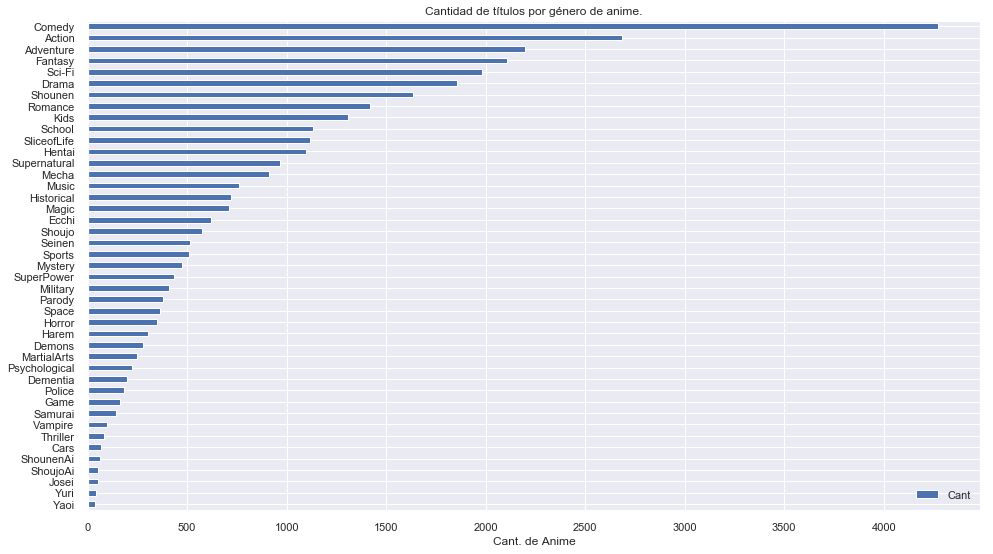

In [270]:
plt.figure(figsize=(12,24));
df_genres.plot(kind= 'barh');
plt.yticks(np.arange(len(df_genres["subgenre"])), df_genres["subgenre"]);
plt.xlabel("Cant. de Anime")
plt.title("Cantidad de títulos por género de anime.");

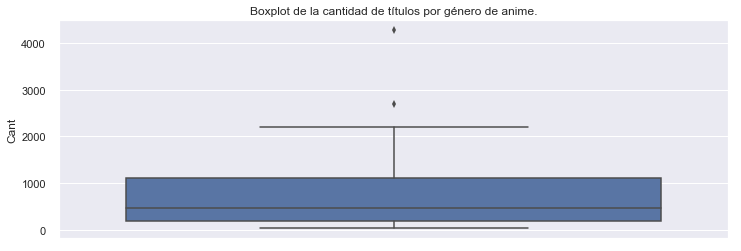

In [271]:
plt.figure(figsize=(12,4))
plt.title("Boxplot de la cantidad de títulos por género de anime.")
sns.boxplot(y=df_genres["Cant"]);

---

In [272]:
df_interacciones.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [273]:
df_titulos.head()

,index,anime_id,name,genre,type,episodes,rating,members,log_members,Action,...,ShounenAi,SliceofLife,Space,Sports,Supernatural,SuperPower,Thriller,Vampire,Yaoi,Yuri
0,0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630,12.209218,None,...,None,None,None,None,1,None,None,None,None,None
1,1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665,13.584417,1,...,None,None,None,None,None,None,None,None,None,None
2,2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262,11.646249,1,...,None,None,None,None,None,None,None,None,None,None
3,3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572,13.420350,None,...,None,None,None,None,None,None,1,None,None,None
4,4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266,11.926795,1,...,None,None,None,None,None,None,None,None,None,None


In [274]:
df_interacciones.shape

(7813727, 3)

In [275]:
df_titulos.shape

(11197, 52)

In [276]:
merged_interacciones = pd.merge(left=df_interacciones, left_on='anime_id',
                        right=df_titulos, right_on='anime_id')

merged_interacciones.shape

(7813727, 54)

In [277]:
merged_interacciones.head()

,user_id,anime_id,rating_x,index,name,genre,type,episodes,rating_y,members,...,ShounenAi,SliceofLife,Space,Sports,Supernatural,SuperPower,Thriller,Vampire,Yaoi,Yuri
0,1,20,-1,841,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220.0,7.81,683297,...,None,None,None,None,None,1,None,None,None,None
1,3,20,8,841,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220.0,7.81,683297,...,None,None,None,None,None,1,None,None,None,None
2,5,20,6,841,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220.0,7.81,683297,...,None,None,None,None,None,1,None,None,None,None
3,6,20,-1,841,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220.0,7.81,683297,...,None,None,None,None,None,1,None,None,None,None
4,10,20,-1,841,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220.0,7.81,683297,...,None,None,None,None,None,1,None,None,None,None


In [278]:
merged_interacciones.rename(columns={"rating_x": "rating", "rating_y": "rating_global"},inplace=True)
merged_interacciones.drop(["index","genre"],axis=1,inplace=True)
merged_interacciones.columns

Index(['user_id', 'anime_id', 'rating', 'name', 'type', 'episodes',
       'rating_global', 'members', 'log_members', 'Action', 'Adventure',
       'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy',
       'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids',
       'Magic', 'MartialArts', 'Mecha', 'Military', 'Music', 'Mystery',
       'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School',
       'Sci-Fi', 'Seinen', 'Shoujo', 'ShoujoAi', 'Shounen', 'ShounenAi',
       'SliceofLife', 'Space', 'Sports', 'Supernatural', 'SuperPower',
       'Thriller', 'Vampire', 'Yaoi', 'Yuri'],
      dtype='object')

In [279]:
merged_interacciones.head()

,user_id,anime_id,rating,name,type,episodes,rating_global,members,log_members,Action,...,ShounenAi,SliceofLife,Space,Sports,Supernatural,SuperPower,Thriller,Vampire,Yaoi,Yuri
0,1,20,-1,Naruto,TV,220.0,7.81,683297,13.434685,1,...,None,None,None,None,None,1,None,None,None,None
1,3,20,8,Naruto,TV,220.0,7.81,683297,13.434685,1,...,None,None,None,None,None,1,None,None,None,None
2,5,20,6,Naruto,TV,220.0,7.81,683297,13.434685,1,...,None,None,None,None,None,1,None,None,None,None
3,6,20,-1,Naruto,TV,220.0,7.81,683297,13.434685,1,...,None,None,None,None,None,1,None,None,None,None
4,10,20,-1,Naruto,TV,220.0,7.81,683297,13.434685,1,...,None,None,None,None,None,1,None,None,None,None


## Creación de los indicadores para medir las interacciones usuarios - anime

**Creación Indicador de Afinidad**
Se crea un indicador de afinidad entre un usuario dado y un anime dado, de acuerdo a los siguientes criterios, que se aplican en orden:



Si el rating otorgado por el usuario es superior al rating global del anime = **5 puntos**


Si el rating otorgado por el usuario es superior a 5 = **4 puntos**


Si el usuario a visualizado la película = **3 puntos**


Si el rating otorgado por el usuario es inferior a 5 = **0 puntos**


*Posteriormente se le asignarán 2 puntos a todas las interacciones no existentes como puntaje basal**

In [280]:
merged_interacciones["afinidad"]=None

In [281]:
# Se implementa el indicador definido

condiciones = [(merged_interacciones.rating <= 5) & (merged_interacciones.rating > -1) ,
               (merged_interacciones.rating == -1),
               (merged_interacciones.rating > 5) & (merged_interacciones.rating < merged_interacciones.rating_global),
               (merged_interacciones.rating > 5) & (merged_interacciones.rating >= merged_interacciones.rating_global)
               ]
afinidades = np.array((0, 3, 4, 5), dtype="int8")
merged_interacciones["afinidad"] = np.select(condiciones, afinidades, None)

**Creación Indicador Apriori**
Se crea un indicador de afinidad entre un usuario dado y un anime dado, para ser utilizado con el algoritmo apriori de caracter binario, de acuerdo a los siguientes criterios, que se aplican en orden:


Si el rating otorgado por el usuario es superior a 6 = **1**


Si el usuario a visualizado la película = **1**


En todos los otros casos se otorgará un **0**


*Posteriormente se construirán listas de relaciones de cada user_id, en donde sólo se incluirán los anime_id con indicador 1**

In [282]:
merged_interacciones["apriori"]=None

In [283]:
# Se implementa el indicador definido

condiciones2 = [(merged_interacciones.rating > 5),
                (merged_interacciones.rating == -1)
               ]
apriori = np.array((1, 1), dtype="int8")
merged_interacciones["apriori"] = np.select(condiciones2, apriori, 0)

In [284]:
merged_interacciones.head()

,user_id,anime_id,rating,name,type,episodes,rating_global,members,log_members,Action,...,Space,Sports,Supernatural,SuperPower,Thriller,Vampire,Yaoi,Yuri,afinidad,apriori
0,1,20,-1,Naruto,TV,220.0,7.81,683297,13.434685,1,...,None,None,None,1,None,None,None,None,3,1
1,3,20,8,Naruto,TV,220.0,7.81,683297,13.434685,1,...,None,None,None,1,None,None,None,None,5,1
2,5,20,6,Naruto,TV,220.0,7.81,683297,13.434685,1,...,None,None,None,1,None,None,None,None,4,1
3,6,20,-1,Naruto,TV,220.0,7.81,683297,13.434685,1,...,None,None,None,1,None,None,None,None,3,1
4,10,20,-1,Naruto,TV,220.0,7.81,683297,13.434685,1,...,None,None,None,1,None,None,None,None,3,1


*Exportamos a .csv los nuevos data sets creados*

In [ ]:
merged_interacciones.to_csv('interacciones_generos.csv',sep=';')
df_titulos.to_csv('titulos_generos.csv',sep=';')

____

### Limpieza del Data Sets de Interacciones

Se procede a la limpieza de los data set, tomando sólo la data con un valor predictivo alto, eliminado los registro de usuarios anómalos, y/o animes con bajas interacciones.

In [285]:
def fx_users_animes(data,limit_up=5000,limit_down=10):
### Función devuelve un data frame con los usuarios 
### y su frecuencia de aparición, de igual forma devuelvo otro 
### con la misma información para los títulos de anime

### limit_up: default =5000 , la cantidad máxima de interacciones aceptadas para un usuario, si lo sobre pasa, elimina al usuario.
### limit_down: default =10 , la cantidad mínima de interacciones aceptadas para un usuario, si tienes menos, elimina al usuario.

    # Se realiza una tabla resumen de las cantidades de interacciones por user_id y por anime_id respectivamente

    df_users = pd.DataFrame({"users":data["user_id"].value_counts().index,"Frec":data["user_id"].value_counts()})
    df_users.sort_values("Frec",inplace=True, ascending=False)  
    df_users = df_users.reset_index()

    df_animes = pd.DataFrame({"animes":data["anime_id"].value_counts().index,"Frec":data["anime_id"].value_counts()})
    df_animes.sort_values("Frec",inplace=True, ascending=False) 
    df_animes = df_animes.reset_index()

    # Se eliminan los valores sobre 5.000, dado que probablemente no corresponde a humanos 
    #y los con una sola interacción dado que no aportan para predecir la recomendación
    df_users = df_users[df_users["Frec"] >= limit_down]
    df_users = df_users[df_users["Frec"] <= limit_up]

    # Se eliminan los anime con una sola interacción dado que no aportan para predecir la recomendación
    df_animes = df_animes[df_animes["Frec"] != 1]
    return df_users , df_animes

In [324]:
def analisis_anomalos(df,var="Frec",title=""):

# Esta función realiza el analisis estadistico por 
# cuartiles para determinan los umbrales de corte en 
# la cantidad de interacciones
    
    q1,q3 = df[var].quantile([.25, .75])
    print("Q1")
    print(q1)
    print("Q3")
    print(q3)
    iqc = q3-q1
    mini_u = q1-1.5*iqc
    maxi_u = q3+1.5*iqc
    print("Corte Inferior:")
    print(mini_u)
    print("Corte Superior:")
    print(maxi_u)
    plt.figure(figsize=(16,16))
    plt.title("Boxplot de la cantidad de interacciones."+title)
    sns.boxplot(y=df[var]);
    print("----------------------")
    
    return mini_u , maxi_u

def recorte(df, maxi_corte, var = "Frec"):
    df_work = df[df[var] <= maxi_corte]
    print(len(df_work))
    return df_work

**Selección de Datos a trabajar: recorte por users**

In [287]:
users_works,animes_works=fx_users_animes(merged_interacciones)

In [288]:
len(users_works)

61772

In [289]:
len(animes_works)

9840

Q1
34.0
Q3
158.0
Corte Inferior:
-152.0
Corte Superior:
344.0
----------------------


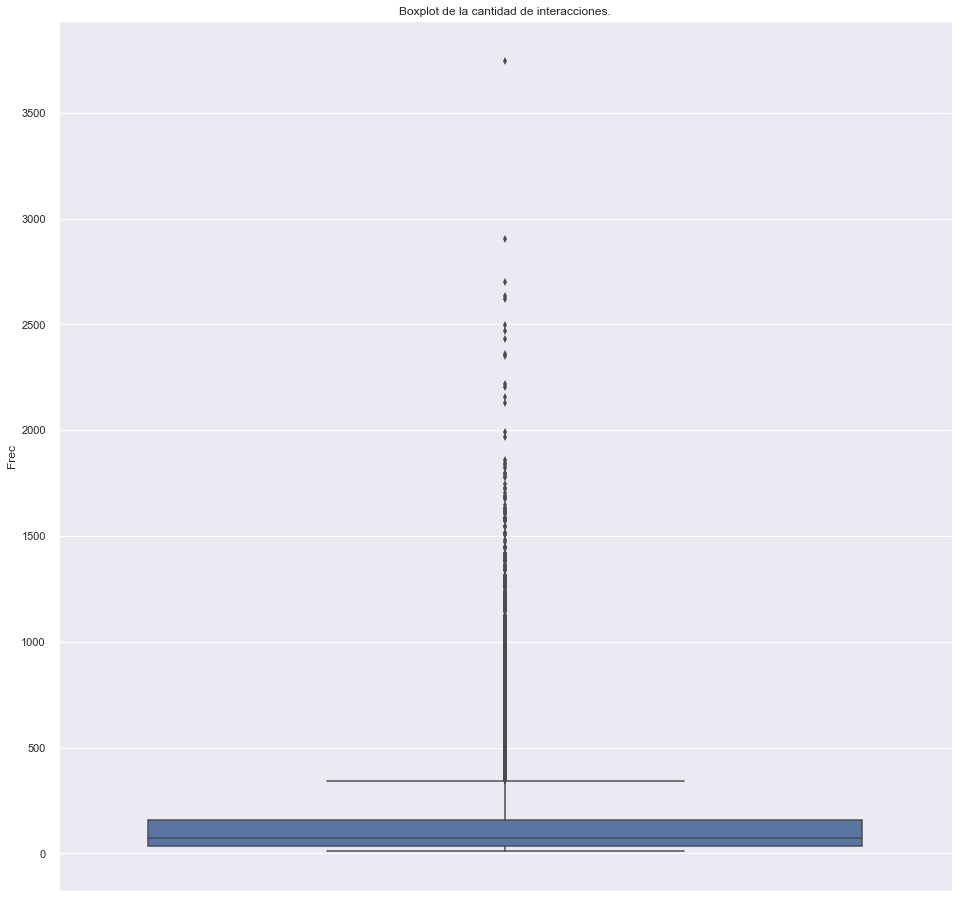

In [290]:
mi,ma=analisis_anomalos(users_works)

**Sólo se trabajará con los registros de usuarios bajo 344 interacciones y sobre 10 interacciones**

In [291]:
users_vf = recorte(users_works,ma)

57449


**Selección de Datos a trabajar: recorte por títulos**

Q1
14.0
Q3
523.0
Corte Inferior:
-749.5
Corte Superior:
1286.5
----------------------


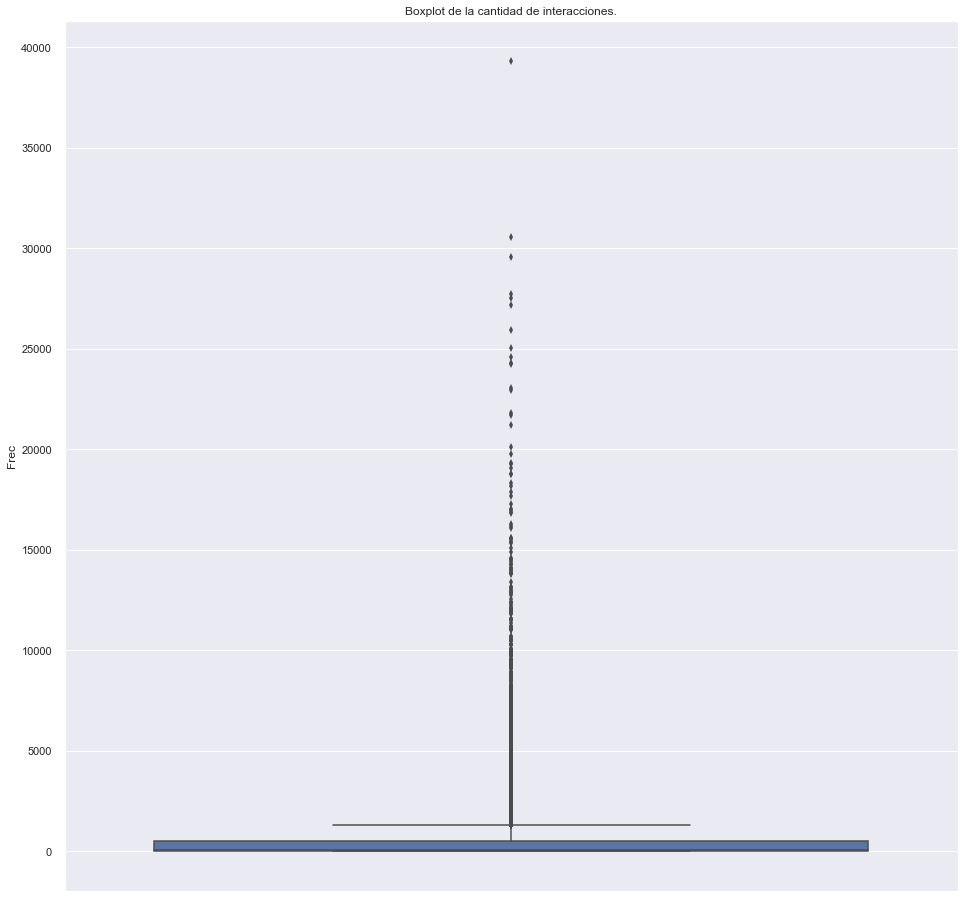

In [292]:
mi_a,ma_a=analisis_anomalos(animes_works)

**Sólo se trabajará con los registros de animes bajo 1.287 interacciones y sobre 10 interacciones**

In [293]:
animes_vf = recorte(animes_works,1287)

8386


**Realizamos el procesamiento final, dejando sólo los registros según las condiciones anteriores**

In [295]:
merged_interacciones.shape

(7813727, 54)

In [296]:
tmp = pd.merge(left=merged_interacciones, left_on='anime_id',
               right=animes_vf, right_on='animes')

In [297]:
df_interacciones = pd.merge(left=tmp, left_on='user_id',
                            right=users_vf, right_on='users')

df_interacciones.columns

Index(['user_id', 'anime_id', 'rating', 'name', 'type', 'episodes',
       'rating_global', 'members', 'log_members', 'Action', 'Adventure',
       'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi', 'Fantasy',
       'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei', 'Kids',
       'Magic', 'MartialArts', 'Mecha', 'Military', 'Music', 'Mystery',
       'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School',
       'Sci-Fi', 'Seinen', 'Shoujo', 'ShoujoAi', 'Shounen', 'ShounenAi',
       'SliceofLife', 'Space', 'Sports', 'Supernatural', 'SuperPower',
       'Thriller', 'Vampire', 'Yaoi', 'Yuri', 'afinidad', 'apriori', 'index_x',
       'animes', 'Frec_x', 'index_y', 'users', 'Frec_y'],
      dtype='object')

In [298]:
df_interacciones.rename(columns={"Frec_x": "Frec_Anime", "Frec_y": "Frec_User"},inplace=True)
df_interacciones.drop(["index_x","index_y","animes","users"],axis=1,inplace=True)
df_interacciones.head()

,user_id,anime_id,rating,name,type,episodes,rating_global,members,log_members,Action,...,Supernatural,SuperPower,Thriller,Vampire,Yaoi,Yuri,afinidad,apriori,Frec_Anime,Frec_User
0,1,1692,-1,_Summer,OVA,2.0,5.88,7051,8.860925,None,...,None,None,None,None,None,None,3,1,367,153
1,1,6163,-1,Kuroshitsuji Recap,Special,1.0,7.32,20616,9.933823,1,...,1,None,None,None,None,None,3,1,862,153
2,1,9581,-1,MM! Specials,Special,9.0,6.77,21462,9.974039,None,...,None,None,None,None,None,None,3,1,1031,153
3,1,11161,-1,Hoshizora e Kakaru Hashi: Kakaru ka? Gakuensai...,Special,1.0,7.02,17770,9.785267,None,...,None,None,None,None,None,None,3,1,925,153
4,1,13561,-1,Guilty Crown: 4-koma Gekijou,Special,11.0,7.23,13053,9.476773,None,...,None,None,None,None,None,None,3,1,322,153


In [299]:
df_interacciones.shape

(775258, 56)

In [300]:
len(df_interacciones.user_id.unique())

48303

In [301]:
len(df_interacciones.anime_id.unique())

7492

In [ ]:
# Exportamos a .csv los df de interacciones final
df_interacciones.to_csv('interacciones_generos_VF.csv',sep=';')

In [302]:
anime_final = pd.DataFrame({"anime_id":df_interacciones["anime_id"].unique()})

In [303]:
df_titulos_VF = pd.merge(left=df_titulos, left_on='anime_id',
               right=anime_final["anime_id"], right_on='anime_id')
df_titulos_VF.shape

(7492, 52)

In [ ]:
# Exportamos a .csv los df de titulos final
df_titulos_VF.to_csv('titulos_generos_VF.csv',sep=';')

### Generamos la tabla final de usuarios versus animes

In [19]:
df_interacciones = pd.read_csv("interacciones_generos_VF.csv", sep=";") 

In [20]:
df_interacciones.columns

Index(['Unnamed: 0', 'user_id', 'anime_id', 'rating', 'name', 'type',
       'episodes', 'rating_global', 'members', 'log_members', 'Action',
       'Adventure', 'Cars', 'Comedy', 'Dementia', 'Demons', 'Drama', 'Ecchi',
       'Fantasy', 'Game', 'Harem', 'Hentai', 'Historical', 'Horror', 'Josei',
       'Kids', 'Magic', 'MartialArts', 'Mecha', 'Military', 'Music', 'Mystery',
       'Parody', 'Police', 'Psychological', 'Romance', 'Samurai', 'School',
       'Sci-Fi', 'Seinen', 'Shoujo', 'ShoujoAi', 'Shounen', 'ShounenAi',
       'SliceofLife', 'Space', 'Sports', 'Supernatural', 'SuperPower',
       'Thriller', 'Vampire', 'Yaoi', 'Yuri', 'afinidad', 'apriori',
       'Frec_Anime', 'Frec_User'],
      dtype='object')

**Indicador de Afinidad**

In [304]:
df_inter_afin = df_interacciones

In [305]:
for j in subgenre:
    df_inter_afin[j] = df_inter_afin[j]*df_inter_afin["afinidad"]

In [306]:
tmp = pd.pivot_table(df_inter_afin,values=subgenre,index=["user_id"],aggfunc=sum)
vs_afinidad_generos = tmp.fillna(0)

In [307]:
vs_afinidad_generos.head()

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,ShounenAi,SliceofLife,Space,Sports,SuperPower,Supernatural,Thriller,Vampire,Yaoi,Yuri
user_id,,,,,,,,,,,,,,,,,,,,,
1,9,0,0,18,0,3,3,12,6,0,...,0,0,0,0,0,3,0,0,0,0
3,18,23,0,23,0,0,9,0,23,0,...,0,4,0,18,14,0,0,0,0,0
4,3,0,0,6,0,0,0,0,6,0,...,0,3,0,0,3,3,0,0,0,0
6,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,103,69,0,204,0,17,38,67,81,9,...,0,59,0,35,33,68,5,9,0,0


In [ ]:
# Exportamos a .csv 
vs_afinidad_generos.to_csv('vs_afinidad_generos_VF.csv',sep=';')

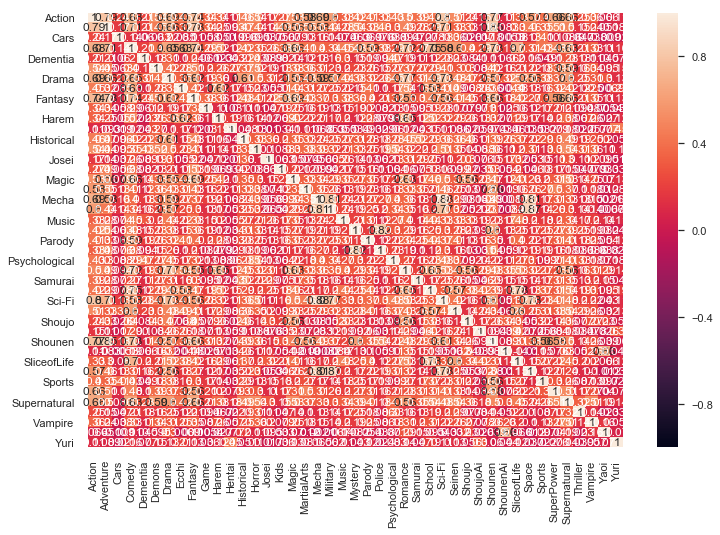

In [308]:
plt.subplots(figsize=(12, 8))
sns.heatmap(vs_afinidad_generos.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

***Se observan correlaciones medias entre los 43 géneros a utilizar para los algoritmos de modelamiento (agrupación)***

**Indicador de Apriori**

In [309]:
df_inter_apri = df_interacciones

In [310]:
df_inter_apri["apriori"].value_counts()

1    705736
0     69522
Name: apriori, dtype: int64

In [311]:
for j in subgenre:
    df_inter_apri[j] = df_inter_apri[j]*df_inter_apri["apriori"]

In [312]:
tmp = pd.pivot_table(df_inter_apri,values=subgenre,index=["user_id"],aggfunc=max)
vs_apriori_generos = tmp.fillna(0)

In [313]:
vs_apriori_generos.head()

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,ShounenAi,SliceofLife,Space,Sports,SuperPower,Supernatural,Thriller,Vampire,Yaoi,Yuri
user_id,,,,,,,,,,,,,,,,,,,,,
1,3.0,0.0,0.0,3.0,0.0,3.0,3.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
3,5.0,5.0,0.0,5.0,0.0,0.0,5.0,0.0,5.0,0.0,...,0.0,4.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0
4,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,3.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,5.0,5.0,0.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0,...,0.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0,0.0,0.0


In [314]:
vs_apri_backup = vs_apriori_generos

In [315]:
for i in subgenre:
    vs_apriori_generos[i] = np.where(vs_apriori_generos[i]==0,None,vs_apriori_generos[i])

In [316]:
vs_apriori_generos.head()

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,ShounenAi,SliceofLife,Space,Sports,SuperPower,Supernatural,Thriller,Vampire,Yaoi,Yuri
user_id,,,,,,,,,,,,,,,,,,,,,
1,3,None,None,3,None,3,3,3,3,None,...,None,None,None,None,None,3,None,None,None,None
3,5,5,None,5,None,None,5,None,5,None,...,None,4,None,5,5,None,None,None,None,None
4,3,None,None,3,None,None,None,None,3,None,...,None,3,None,None,3,3,None,None,None,None
6,None,None,None,3,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,5,5,None,5,None,5,5,5,5,5,...,None,5,None,5,5,5,5,5,None,None


In [317]:
for j in subgenre:
    vs_apriori_generos[j].replace(1,j,inplace=True)
vs_apriori_generos.head()

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,ShounenAi,SliceofLife,Space,Sports,SuperPower,Supernatural,Thriller,Vampire,Yaoi,Yuri
user_id,,,,,,,,,,,,,,,,,,,,,
1,3.0,NaN,NaN,3.0,NaN,3.0,3.0,3.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
3,5.0,5.0,NaN,5.0,NaN,NaN,5.0,NaN,5.0,NaN,...,NaN,4.0,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0,NaN,...,NaN,3.0,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5.0,5.0,NaN,5.0,NaN,5.0,5.0,5.0,5.0,5.0,...,NaN,5.0,NaN,5.0,5.0,5.0,5.0,5.0,NaN,NaN


In [326]:
def apriorizar(fila):
# Se construye esta función para entregar 
# en un atributo, como una lista, todos 
# los géneros relacionados a un usuario

    tmp = fila.values.tolist()
    res = list(filter(None, tmp))
    return res

vs_apriori_generos["aprioris"] = vs_apriori_generos[subgenre].apply((apriorizar), axis=1)

In [319]:
vs_apriori_generos.head()

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,SliceofLife,Space,Sports,SuperPower,Supernatural,Thriller,Vampire,Yaoi,Yuri,aprioris
user_id,,,,,,,,,,,,,,,,,,,,,
1,3.0,NaN,NaN,3.0,NaN,3.0,3.0,3.0,3.0,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,"[3.0, nan, nan, 3.0, nan, 3.0, 3.0, 3.0, 3.0, ..."
3,5.0,5.0,NaN,5.0,NaN,NaN,5.0,NaN,5.0,NaN,...,4.0,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,"[5.0, 5.0, nan, 5.0, nan, nan, 5.0, nan, 5.0, ..."
4,3.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0,NaN,...,3.0,NaN,NaN,3.0,3.0,NaN,NaN,NaN,NaN,"[3.0, nan, nan, 3.0, nan, nan, nan, nan, 3.0, ..."
6,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[nan, nan, nan, 3.0, nan, nan, nan, nan, nan, ..."
7,5.0,5.0,NaN,5.0,NaN,5.0,5.0,5.0,5.0,5.0,...,5.0,NaN,5.0,5.0,5.0,5.0,5.0,NaN,NaN,"[5.0, 5.0, nan, 5.0, nan, 5.0, 5.0, 5.0, 5.0, ..."


In [48]:
# Exportamos a .csv 
vs_apriori_generos.to_csv('vs_apriori_generos_VF_woNone.csv',sep=';')

----

In [49]:
df_titulos_VF = pd.read_csv("titulos_generos_VF20200518.csv", sep=";") 
df_interacciones = pd.read_csv("interacciones_generos_VF.csv", sep=";") 
vs_afinidad_generos = pd.read_csv('vs_afinidad_generos_VF.csv',sep=';')

---
Se genera un data sets, basado en el indicador de afinidad anterior, pero en el cual se determinará más de un género afin por usuario para mejorar la predicción

In [320]:
vs_afinidad_5generos = vs_afinidad_generos
vs_afinidad_5generos.head()

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,ShounenAi,SliceofLife,Space,Sports,SuperPower,Supernatural,Thriller,Vampire,Yaoi,Yuri
user_id,,,,,,,,,,,,,,,,,,,,,
1,9,0,0,18,0,3,3,12,6,0,...,0,0,0,0,0,3,0,0,0,0
3,18,23,0,23,0,0,9,0,23,0,...,0,4,0,18,14,0,0,0,0,0
4,3,0,0,6,0,0,0,0,6,0,...,0,3,0,0,3,3,0,0,0,0
6,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,103,69,0,204,0,17,38,67,81,9,...,0,59,0,35,33,68,5,9,0,0


In [51]:
vs_afinidad_5generos ["Cant.Genre"] = vs_afinidad_5generos[subgenre].apply(np.count_nonzero, axis=1)

In [52]:
vs_afinidad_5generos ["Mean Afinidad"] = vs_afinidad_5generos[subgenre].apply(np.mean, axis=1)

In [53]:
def prom_ajustado(fila):
    prom_ajustado = np.sum(fila)/np.count_nonzero(fila)
    return prom_ajustado

vs_afinidad_5generos ["Mean2 Afinidad"] = vs_afinidad_5generos[subgenre].apply((prom_ajustado), axis=1)

In [54]:
vs_afinidad_5generos.head()

,user_id,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,...,Sports,SuperPower,Supernatural,Thriller,Vampire,Yaoi,Yuri,Cant.Genre,Mean Afinidad,Mean2 Afinidad
0,1,9,0,0,18,0,3,3,12,6,...,0,0,3,0,0,0,0,14,2.441860,7.500000
1,3,18,23,0,23,0,0,9,0,23,...,18,14,0,0,0,0,0,11,4.116279,16.090909
2,4,3,0,0,6,0,0,0,0,6,...,0,3,3,0,0,0,0,12,0.976744,3.500000
3,6,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,6,0.418605,3.000000
4,7,103,69,0,204,0,17,38,67,81,...,35,33,68,5,9,0,0,32,34.186047,45.937500


In [55]:
vs_afinidad_5generos ["Max1"] = vs_afinidad_5generos[subgenre].apply(np.amax, axis=1)

In [56]:
vs_afinidad_5generos ["Max1_G"] = vs_afinidad_5generos[subgenre].apply(np.argmax, axis=1)

In [57]:
vs_afinidad_5generos.head()

,user_id,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,...,Supernatural,Thriller,Vampire,Yaoi,Yuri,Cant.Genre,Mean Afinidad,Mean2 Afinidad,Max1,Max1_G
0,1,9,0,0,18,0,3,3,12,6,...,3,0,0,0,0,14,2.441860,7.500000,18,Comedy
1,3,18,23,0,23,0,0,9,0,23,...,0,0,0,0,0,11,4.116279,16.090909,23,Adventure
2,4,3,0,0,6,0,0,0,0,6,...,3,0,0,0,0,12,0.976744,3.500000,6,Comedy
3,6,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,6,0.418605,3.000000,3,Comedy
4,7,103,69,0,204,0,17,38,67,81,...,68,5,9,0,0,32,34.186047,45.937500,204,Comedy


In [219]:
def maximos(fila):
    a = np.amax(fila)
    vec = np.where(fila.tolist() == a,1,0)
    tmp2 = fila.tolist()
    vec2 = np.zeros(len(tmp2))
    tmp2.remove(a) 
    if len(tmp2) == len(subgenre)-1:
        b = np.amax(tmp2)
        vec2 = np.where(fila.tolist() == b,1,0)
    #vvf= [ j+k for (j, k) in zip(vec, vec2) ]
    maxs = []
    for n,i in enumerate(vec):
        if i==1 or vec2[n]==1:
            maxs.append(subgenre[n])
    return maxs

vs_afinidad_5generos ["Maximos"] = vs_afinidad_5generos[subgenre].apply((maximos), axis=1)

In [223]:
vs_afinidad_5generos.head()

,user_id,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,...,Thriller,Vampire,Yaoi,Yuri,Cant.Genre,Mean Afinidad,Mean2 Afinidad,Max1,Max1_G,Maximos
0,1,9,0,0,18,0,3,3,12,6,...,0,0,0,0,14,2.441860,7.500000,18,Comedy,"[Comedy, Ecchi, Harem, Romance, School]"
1,3,18,23,0,23,0,0,9,0,23,...,0,0,0,0,11,4.116279,16.090909,23,Adventure,"[Adventure, Comedy, Fantasy, Kids]"
2,4,3,0,0,6,0,0,0,0,6,...,0,0,0,0,12,0.976744,3.500000,6,Comedy,"[Comedy, Fantasy]"
3,6,0,0,0,3,0,0,0,0,0,...,0,0,0,0,6,0.418605,3.000000,3,Comedy,"[Comedy, Historical, Mystery, School, Seinen, ..."
4,7,103,69,0,204,0,17,38,67,81,...,5,9,0,0,32,34.186047,45.937500,204,Comedy,"[Comedy, Romance]"


---

In [136]:
vs_afinidad_5generos["Max1_G"].value_counts()

Comedy           18738
Action           10146
Adventure         3404
Drama             3374
Sci-Fi            2192
Romance           1982
Shounen           1636
Fantasy           1461
Hentai             874
Shoujo             584
School             478
Ecchi              434
Mecha              360
SliceofLife        329
Music              292
Supernatural       274
Mystery            211
Sports             193
Horror             183
Magic              174
Historical         126
Dementia           103
Military            98
Harem               97
Seinen              97
Game                88
Demons              72
Yaoi                66
Kids                48
ShoujoAi            44
Psychological       41
Cars                35
ShounenAi           34
MartialArts         13
SuperPower           7
Parody               5
Police               3
Josei                3
Thriller             2
Samurai              2
Name: Max1_G, dtype: int64

In [224]:
# Exportamos a .csv 
vs_afinidad_5generos.to_csv('vs_afin_maxgen_VF.csv',sep=';')

## Principales hallazgos

Existen 2 géneros que son ampliamente afines a los usuarios "Comedy" (18.738 usuarios) y "Action" (10.146 usuarios)